In [7]:
import pandas as pd

In [8]:
# import Giant Bomb
gb = pd.read_csv("giantbomb/giantbomb_reviews.csv", encoding='utf-8')

In [9]:
# import IGN
colHeader = ['game','date','reviewer','link','review']
IGN = pd.read_csv('IGN_1.csv', names = colHeader)
IGN['site'] = 'IGN'

In [10]:
# import Game Spot
colHeader2 = ['reviewer', 'date', 'game', 'link', 'score', 'platforms', 'review']
gamespot = pd.read_csv('gamespot/GAMESPOT_UPDATED.csv', names = colHeader2)
gamespot['site'] = 'GameSpot'
gamespot['score_100'] = 10*gamespot['score']

In [11]:
# convert date columns to datetime
gamespot["date"] = pd.to_datetime(gamespot.date, dayfirst=True)
IGN["date"] = pd.to_datetime(IGN.date, dayfirst=True)
gb["date"] = pd.to_datetime(gb.date, dayfirst=False)

In [12]:
results = pd.concat([gb, IGN, gamespot], ignore_index=True)

In [13]:
results.to_csv('results.csv', encoding='utf-8', index=False)

In [14]:
results.shape

(1361, 9)

In [15]:
from bs4 import BeautifulSoup
import urllib2
import requests
import re
import os
import numpy as np

In [16]:
gb_means = gb
gb_means['review_length'] = np.nan


In [17]:
for index, row in gb_means.iterrows():
    gb_means['review_length'][index] = len(row['review'].split())

c:\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [18]:
gb_means.tail()

,game,date,reviewer,link,review,site,platforms,score,score_100,review_length
654,The Order: 1886,2015-02-19 05:01:00,Jeff Gerstmann,http://www.giantbomb.com/api/review/1900-698/,The Order: 1886 feels like a collection of hal...,Giant Bomb,PlayStation 4,2,40,1456
655,Battlefield Hardline,2015-03-17 17:50:00,Jeff Gerstmann,http://www.giantbomb.com/api/review/1900-699/,"Vehicles are still a factor, but we're mostly ...",Giant Bomb,"Xbox One, PlayStation 4",3,60,1154
656,Hotline Miami 2: Wrong Number,2015-03-20 13:29:00,Alex Navarro,http://www.giantbomb.com/api/review/1900-700/,Hotline Miami was an exquisitely nasty good ti...,Giant Bomb,"PlayStation 4, PlayStation Network (Vita), PC",3,60,1833
657,Axiom Verge,2015-03-30 05:00:00,Jeff Gerstmann,http://www.giantbomb.com/api/review/1900-701/,Axiom Verge is not Metroid.It certainly looks ...,Giant Bomb,"PlayStation 4, PC",5,100,810
658,Mortal Kombat X,2015-04-13 14:00:00,Jeff Gerstmann,http://www.giantbomb.com/api/review/1900-703/,"2011's Mortal Kombat was a terrific, fresh st...",Giant Bomb,"PlayStation 4, Xbox One, PC",4,80,2235


In [19]:
grouped = gb_means.groupby(['site', 'reviewer'])
calculated_means = grouped.mean()

In [20]:
results['review_length'] = np.nan
for index, row in results.iterrows():
    results.loc[index, 'review_length'] = len(row['review'].split())

In [49]:
grouped = results.groupby(['site', 'reviewer'])
calculated_means = grouped.mean()

In [50]:
calculated_means.to_csv('calculated_means.csv', encoding='utf-8', index=True)

In [81]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
from pandas.tools.plotting import scatter_matrix
matplotlib.style.use('ggplot')

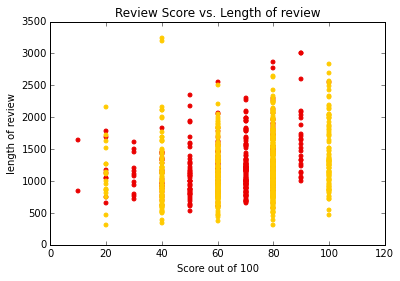

In [54]:
# get scatter of scores and review length
x = results['score_100']
y = results['review_length']

# Get unique names of
uniq = list(set(results['site']))

# Set the color map to match the number of species
z = range(1,len(uniq))
hot = plt.get_cmap('hot')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

# Plot each species
for i in range(len(uniq)):
    indx = results['site'] == uniq[i]
    plt.scatter(x[indx], y[indx], s=15, color=scalarMap.to_rgba(i))

plt.xlabel('Score out of 100')
plt.ylabel('length of review')
plt.title('Review Score vs. Length of review')
plt.legend()
plt.show()

In [ ]:
grouped = results.groupby(['site', 'reviewer'])
calculated_means = grouped.mean()

In [32]:
sites = ['Giant Bomb', 'IGN', 'GameSpot']

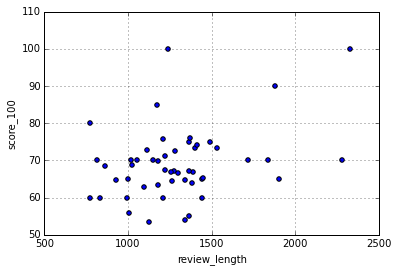

In [55]:
calculated_means.plot(kind='scatter', x='review_length', y='score_100')

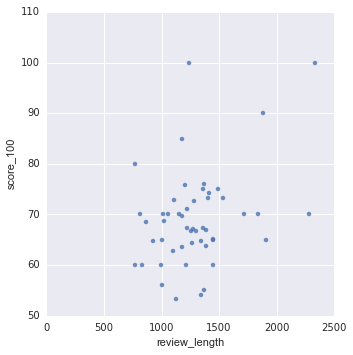

In [75]:
import seaborn as sns
sns.lmplot("review_length", "score_100", data=calculated_means, fit_reg=False)

In [70]:
groups = results.groupby(['site'])
groups_mean = groups.mean()

In [73]:
groups_mean

,score,score_100,review_length
site,,,
GameSpot,6.561905,65.619048,1249.164286
Giant Bomb,3.525038,70.500759,1215.091047
IGN,NaN,NaN,897.127660


site
GameSpot      Axes(0.125,0.125;0.775x0.775)
Giant Bomb    Axes(0.125,0.125;0.775x0.775)
IGN           Axes(0.125,0.125;0.775x0.775)
dtype: object

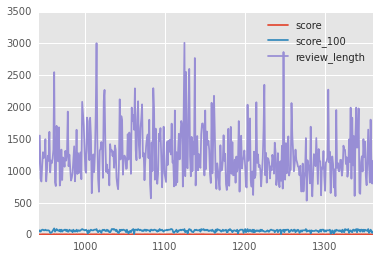

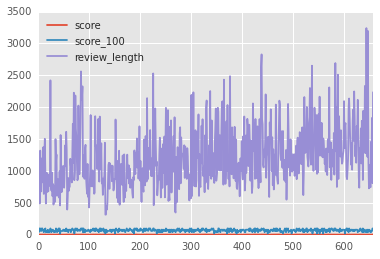

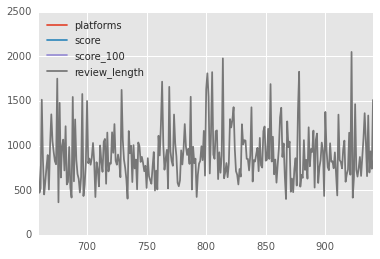

In [106]:
df = results[['review_length','reviewer']]
groups.plot()
